In [45]:
#import lib dulu
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.gridspec import GridSpec
from collections import Counter

#set tyle buat visualisasi
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("magma")
sns.set_context("talk", font_scale=1.2)
plt.rcParams['font.family'] = 'monospace'

###Buatlah fungsi yang menerima nama panjang sebagai input dan mengembalikan list huruf-hurufnya.

In [46]:
def get_letters(fullname):
    """
    Balikin list huruf-huruf yang ada di nama lengkap.
    """
    return list(fullname.lower()) #spasi keitung

    #versi gak hitung spasi
    #return [h for h in fullname.lower() if h.isalpha()]

# contoh
nama = "Rambati Lumbung Pardja"
huruf_list = get_letters(nama)

print(f"List huruf dalam nama '{nama}':")
print(huruf_list)

List huruf dalam nama 'Rambati Lumbung Pardja':
['r', 'a', 'm', 'b', 'a', 't', 'i', ' ', 'l', 'u', 'm', 'b', 'u', 'n', 'g', ' ', 'p', 'a', 'r', 'd', 'j', 'a']


###Buatlah fungsi untuk menghitung jumlah huruf vokal dan huruf konsonan dalam nama tersebut

In [47]:
def hitung_vokal_konsonan(huruf):
    """
    Hitung jumlah huruf vokal dan konsonan dari nama
    """
    vokal = "aiueo"
    vokal_jumlah = 0
    konsonan_jumlah = 0

    # Pakai dictionary buat hitung vokal
    vokal_hitung = {v: 0 for v in vokal}

    # Dictionary untuk menghitung konsonan
    konsonan_hitung = {}

    for h in huruf:  #udah lowercase dari get_letters()
        if h in vokal:
            vokal_jumlah += 1
            vokal_hitung[h] += 1
        elif h.isalpha():
            konsonan_jumlah += 1
            if h in konsonan_hitung:
                konsonan_hitung[h] += 1
            else:
                konsonan_hitung[h] = 1  # Mulai dari 1 setiap nemu konsonan

    return vokal_jumlah, konsonan_jumlah, vokal_hitung, konsonan_hitung

###Tambahkan visualisasi (misalnya pie chart atau bar chart) untuk menampilkan perbandingan jumlah huruf vokal dan konsonan.

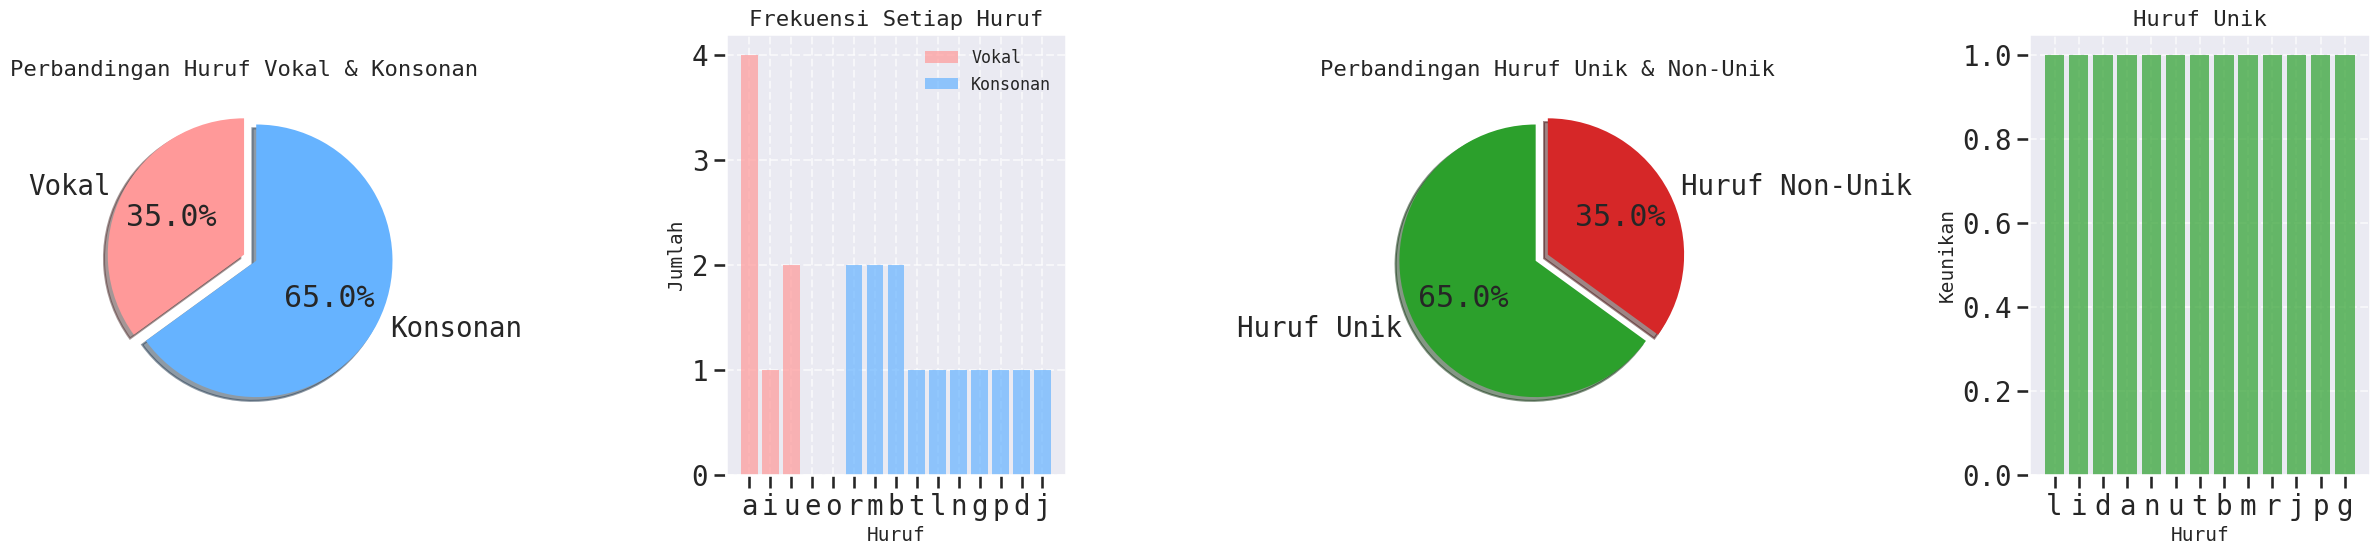

In [48]:
def visualisasi_huruf(vokal_jumlah, konsonan_jumlah, vokal_hitung, konsonan_hitung, huruf_unik):
    """
    Menampilkan pie chart, bar chart, horizontal bar chart, dan visualisasi huruf unik.
    """
    # Pie chart: Perbandingan huruf vokal & konsonan
    labels_vk = ['Vokal', 'Konsonan']
    sizes_vk = [vokal_jumlah, konsonan_jumlah]
    colors_vk = ['#ff9999', '#66b3ff']
    explode_vk = (0, 0.1)  # Supaya Konsonan agak ditonjolin

    # Pie chart: Huruf Unik vs Non-Unik
    labels_unik = ['Huruf Unik', 'Huruf Non-Unik']
    sizes_unik = [len(huruf_unik), (vokal_jumlah + konsonan_jumlah) - len(huruf_unik)]
    colors_unik = ['#2ca02c', '#d62728']
    explode_unik = (0.1, 0)  # Supaya Huruf Unik agak ditonjolin

    # Bar chart: Frekuensi huruf unik
    frekuensi_unik = {h: 1 for h in huruf_unik}  # Setiap huruf unik dihitung sebagai 1

    fig = plt.figure(figsize=(24, 6))
    gs = GridSpec(1, 4, figure=fig)  # 1 row, 4 columns

    # Pie Chart: Vokal vs Konsonan
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.pie(sizes_vk, labels=labels_vk, autopct='%1.1f%%', colors=colors_vk, startangle=90, explode=explode_vk, shadow=True)
    ax1.set_title('Perbandingan Huruf Vokal & Konsonan', fontsize=16)

    # Bar Chart: Frekuensi setiap huruf vokal & konsonan
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.bar(vokal_hitung.keys(), vokal_hitung.values(), color='#ff9999', label="Vokal", alpha=0.7)
    ax2.bar(konsonan_hitung.keys(), konsonan_hitung.values(), color='#66b3ff', label="Konsonan", alpha=0.7)
    ax2.set_xlabel("Huruf", fontsize=14)
    ax2.set_ylabel("Jumlah", fontsize=14)
    ax2.set_title("Frekuensi Setiap Huruf", fontsize=16)
    ax2.legend(fontsize=12)
    ax2.grid(True, linestyle='--', alpha=0.6)

    # Pie Chart: Huruf Unik vs Non-Unik
    ax3 = fig.add_subplot(gs[0, 2])
    ax3.pie(sizes_unik, labels=labels_unik, autopct='%1.1f%%', colors=colors_unik, startangle=90, explode=explode_unik, shadow=True)
    ax3.set_title('Perbandingan Huruf Unik & Non-Unik', fontsize=16)

    # Bar Chart: Huruf Unik
    ax4 = fig.add_subplot(gs[0, 3])
    ax4.bar(frekuensi_unik.keys(), frekuensi_unik.values(), color='#2ca02c', alpha=0.7)
    ax4.set_xlabel("Huruf", fontsize=14)
    ax4.set_ylabel("Keunikan", fontsize=14)
    ax4.set_title("Huruf Unik", fontsize=16)
    ax4.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()

# Panggil Fungsi Visualisasi
visualisasi_huruf(vokal_jumlah, konsonan_jumlah, vokal_hitung, konsonan_hitung, huruf_unik)

###Buatlah fungsi tambahan untuk menghitung jumlah huruf unik dalam nama panjang (huruf yang tidak berulang)

In [49]:
from collections import Counter

def get_letters(fullname):
    """
    Balikin list huruf-huruf yang ada di nama lengkap, tanpa spasi.
    """
    return [h for h in fullname.lower() if h.isalpha()]  # Hanya ambil huruf, spasinya gausa

def hitung_huruf_unik(huruf):
    """
    Hitung jumlah huruf unik dalam nama panjang (huruf yang berbeda, tanpa menghitung spasi).
    """
    #pake set untuk mendapatkan huruf unik
    huruf_unik = set(huruf)

    return len(huruf_unik), huruf_unik

#contoh
nama = "Rambati Lumbung Pardja"
letters = get_letters(nama)  # Ambil huruf tanpa spasi
jumlah_huruf_unik, huruf_unik = hitung_huruf_unik(letters)
print(f"List huruf dalam nama '{nama}': {letters}")
print(f"Jumlah huruf unik: {jumlah_huruf_unik}")
print(f"Detail huruf unik: {huruf_unik}")

List huruf dalam nama 'Rambati Lumbung Pardja': ['r', 'a', 'm', 'b', 'a', 't', 'i', 'l', 'u', 'm', 'b', 'u', 'n', 'g', 'p', 'a', 'r', 'd', 'j', 'a']
Jumlah huruf unik: 13
Detail huruf unik: {'l', 'i', 'd', 'a', 'n', 'u', 't', 'b', 'm', 'r', 'j', 'p', 'g'}


Masukkan nama panjang: Hubert Blaine Wolfeschlegelsteinhausenbergerdorff Sr.

Hasil Analisis:
Nama: Hubert Blaine Wolfeschlegelsteinhausenbergerdorff Sr.
Jumlah huruf vokal: 17
Jumlah huruf konsonan: 32
Jumlah huruf unik: 17
Detail huruf unik: {'l', 's', 'i', 'd', 'h', 'a', 'n', 'f', 'u', 't', 'b', 'c', 'r', 'e', 'w', 'o', 'g'}
Huruf konsonan lebih banyak.


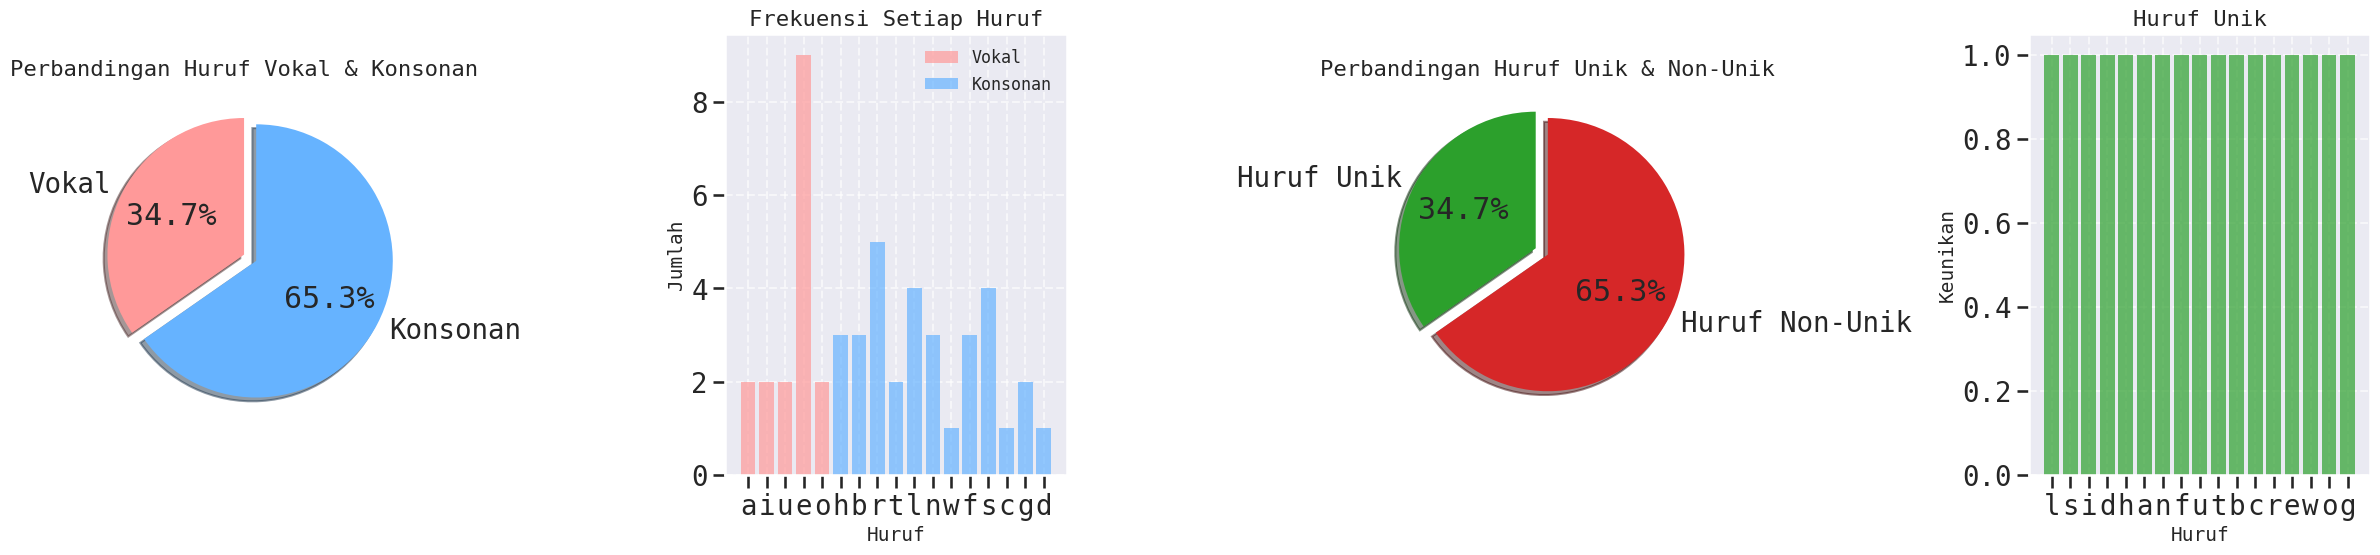

In [50]:
# Input Nama dari User
nama = input("Masukkan nama panjang: ")

# Eksekusi Semua Fungsi yang Udah Dibikin
letters = get_letters(nama)
vokal_count, konsonan_count, vokal_hitung, konsonan_hitung = hitung_vokal_konsonan(letters)
perbandingan = bandingkan_vokal_konsonan(vokal_count, konsonan_count)
jumlah_huruf_unik, huruf_unik = hitung_huruf_unik(letters)

# Print Hasil Analisis
print("\nHasil Analisis:")
print(f"Nama: {nama}")
print(f"Jumlah huruf vokal: {vokal_count}")
print(f"Jumlah huruf konsonan: {konsonan_count}")
print(f"Jumlah huruf unik: {jumlah_huruf_unik}")
print(f"Detail huruf unik: {huruf_unik}")
print(perbandingan)

#tampil
visualisasi_huruf(vokal_count, konsonan_count, vokal_hitung, konsonan_hitung, huruf_unik)